# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
- Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
import pandas as pd
import numpy as np

In [ ]:
#Data Importing
df = pd.read_csv('Data/Wholesale_Data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
#Data Cleaning
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [12]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [13]:
df.isnull().any()

Channel             False
Region              False
Fresh               False
Milk                False
Grocery             False
Frozen              False
Detergents_Paper    False
Delicassen          False
dtype: bool

In [17]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [19]:
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [20]:
df.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [21]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
435    False
436    False
437    False
438    False
439    False
Length: 440, dtype: bool

In [ ]:
#Data Description
df.describe().round(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.00,440.00,440.00,440.00,440.00,440.00,440.00,440.00
mean,1.32,2.54,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,0.47,0.77,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,1.00,1.00,3.00,55.00,3.00,25.00,3.00,3.00
25%,1.00,2.00,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,1.00,3.00,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,2.00,3.00,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,2.00,3.00,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00


In [26]:
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

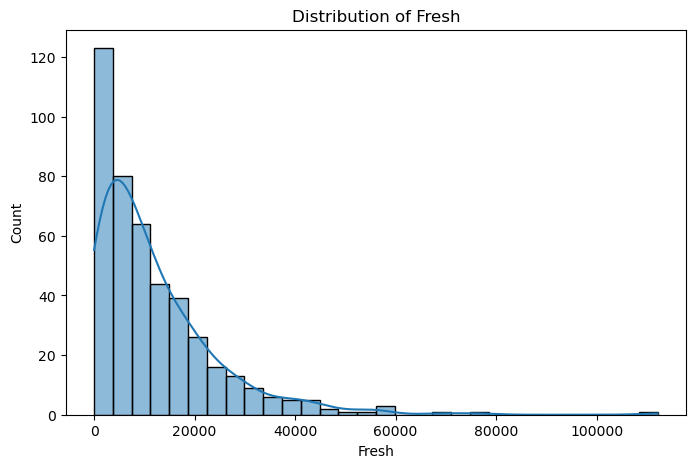

In [27]:
#Histrogram 
plt.figure(figsize=(8,5))
sns.histplot(df['Fresh'], bins=30, kde=True)
plt.title('Distribution of Fresh')
plt.xlabel('Fresh')
plt.ylabel('Count')
plt.show()

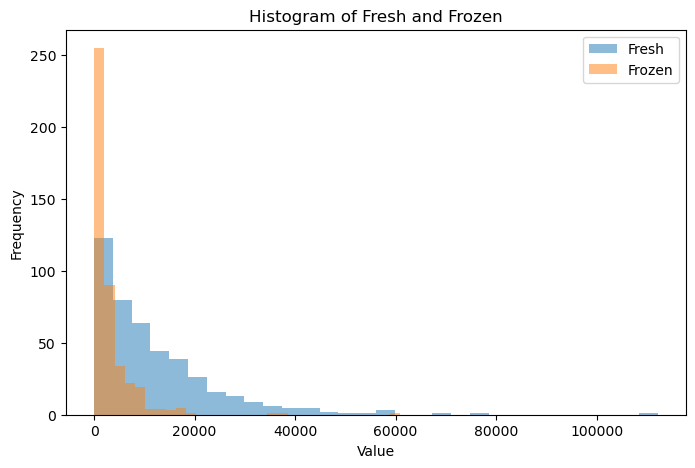

In [32]:

plt.figure(figsize=(8,5))

plt.hist(df['Fresh'], bins=30, alpha=0.5, label='Fresh')
plt.hist(df['Frozen'], bins=30, alpha=0.5, label='Frozen')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Fresh and Frozen')
plt.legend()
plt.show()

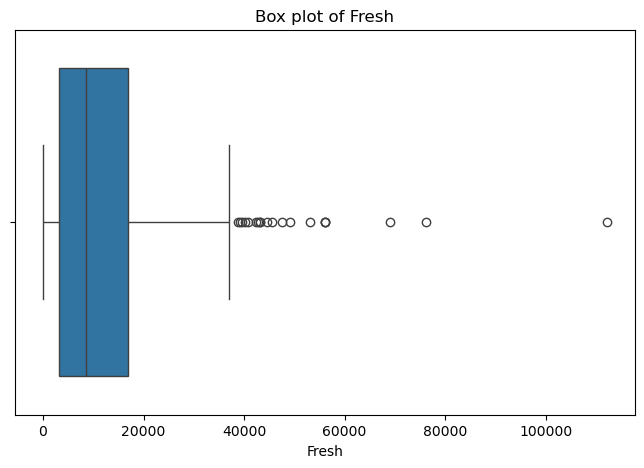

In [38]:
#Box Plot
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Fresh'])
plt.title('Box plot of Fresh')
plt.show()

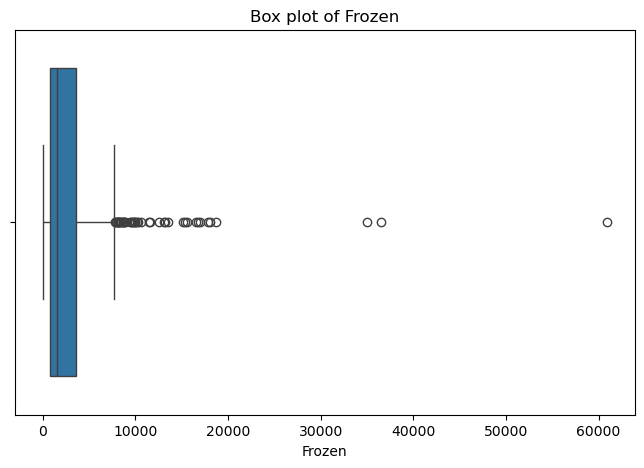

In [39]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Frozen'])
plt.title('Box plot of Frozen')
plt.show()

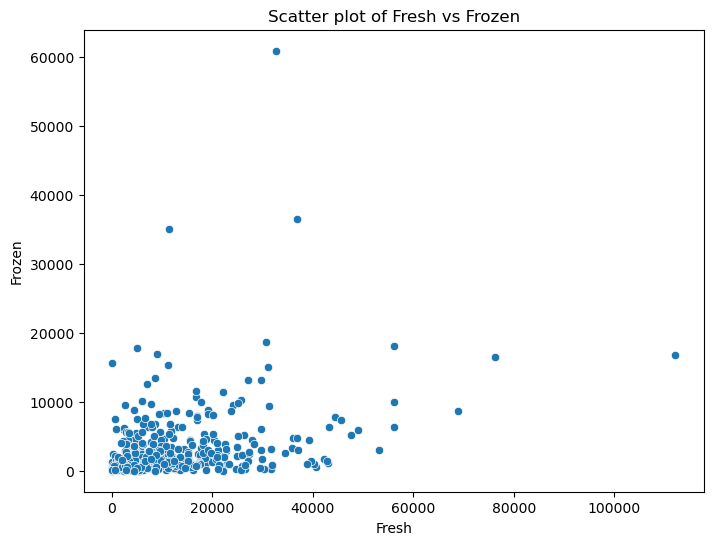

In [33]:
#Scatter Plot 
plt.figure(figsize=(8,6))
sns.scatterplot(x='Fresh', y='Frozen', data=df)
plt.title('Scatter plot of Fresh vs Frozen')
plt.xlabel('Fresh')
plt.ylabel('Frozen')
plt.show()

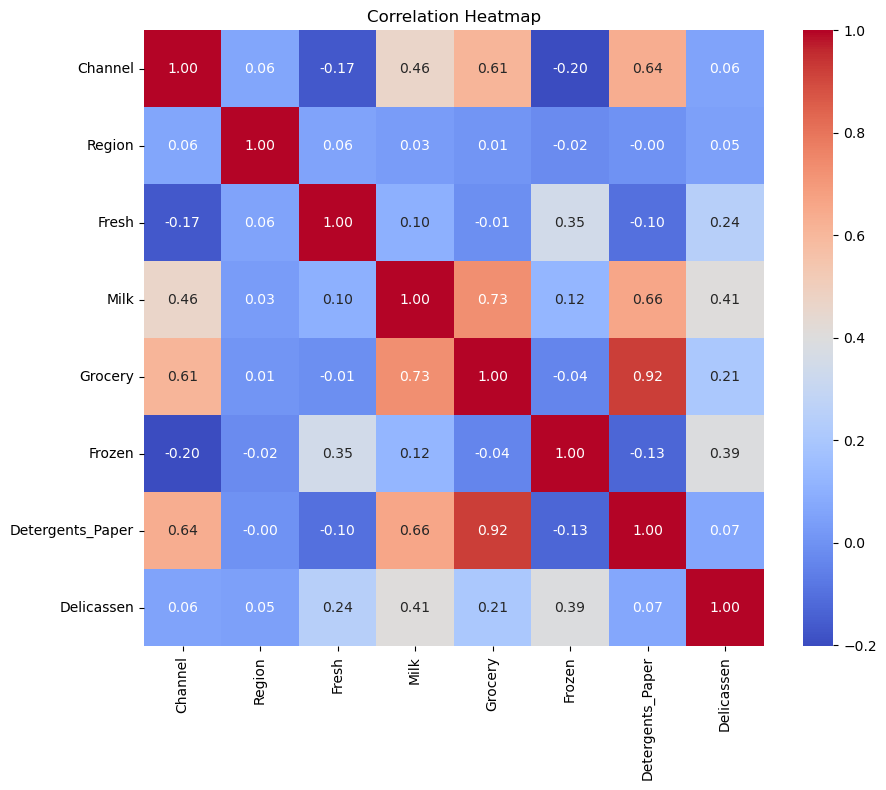

In [30]:
#Heatmap 
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


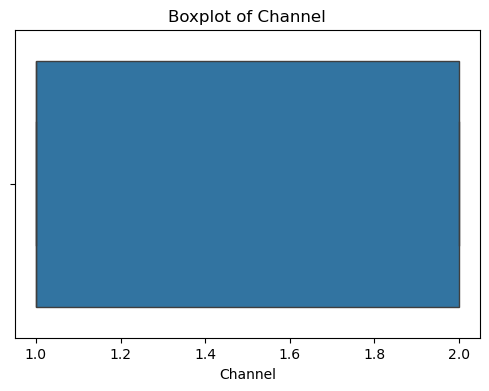

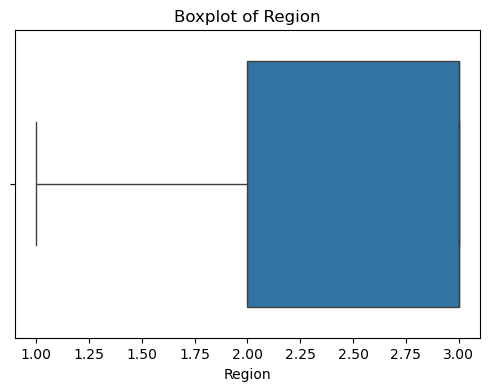

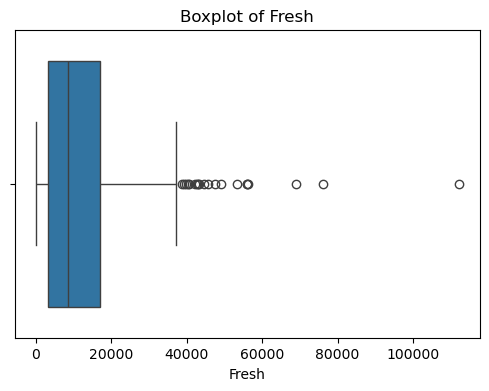

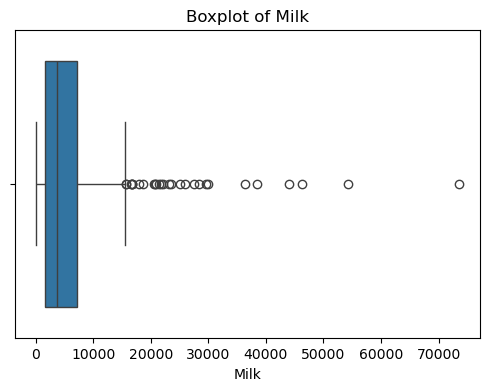

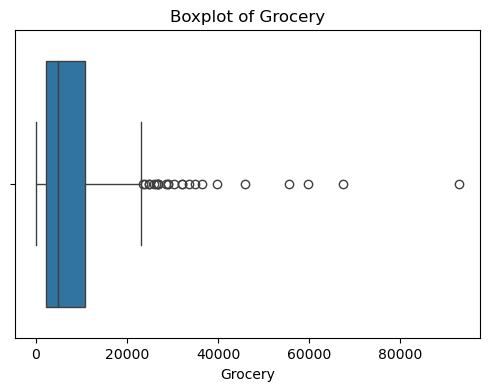

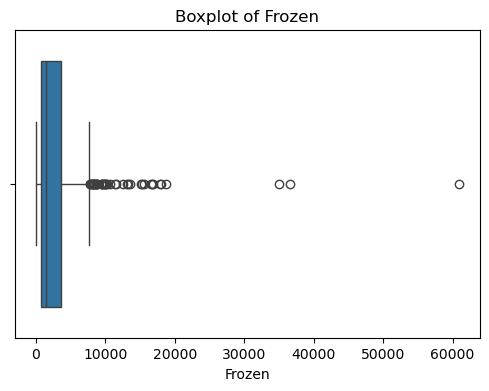

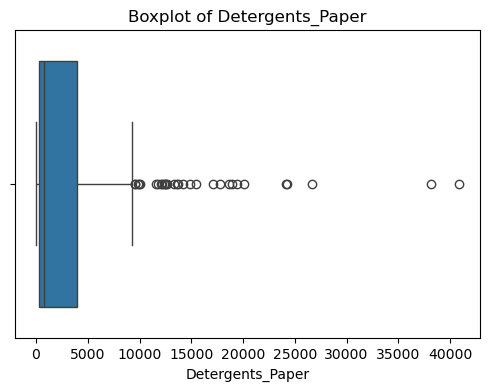

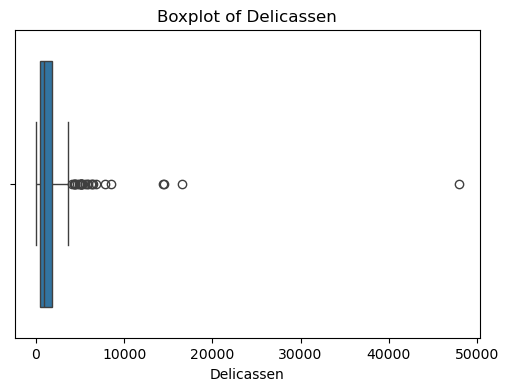

In [ ]:
#Outlier detection
for column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [ ]:
#Data appears to be highly skewed in outlier detection output, checking if data skewed 
df.skew(numeric_only=True)

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

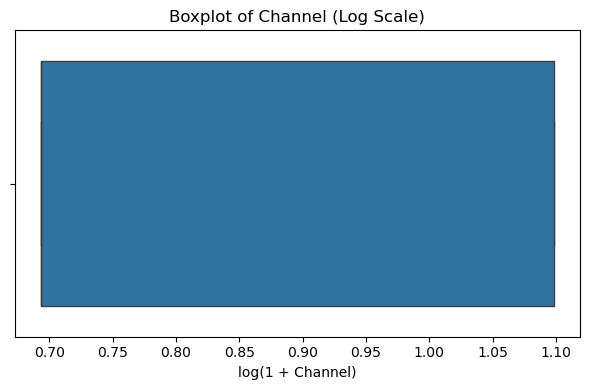

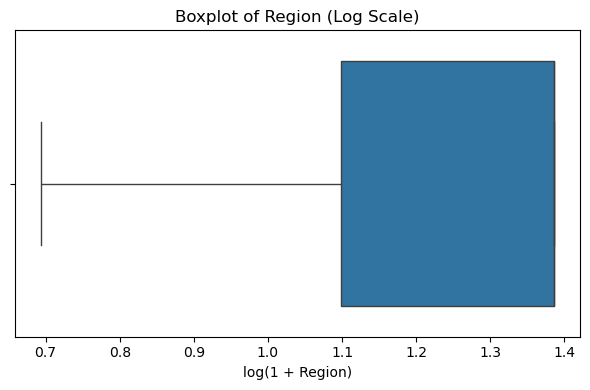

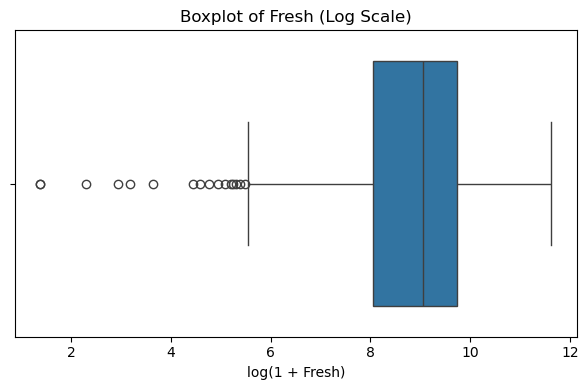

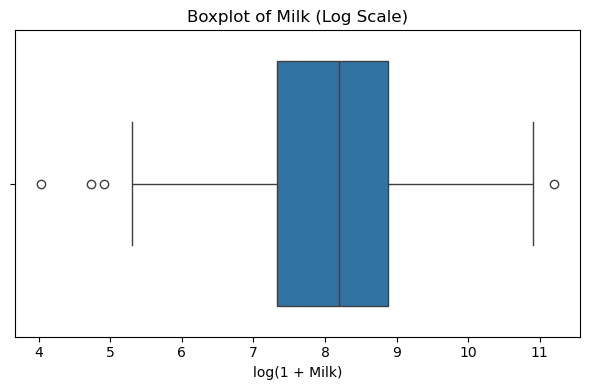

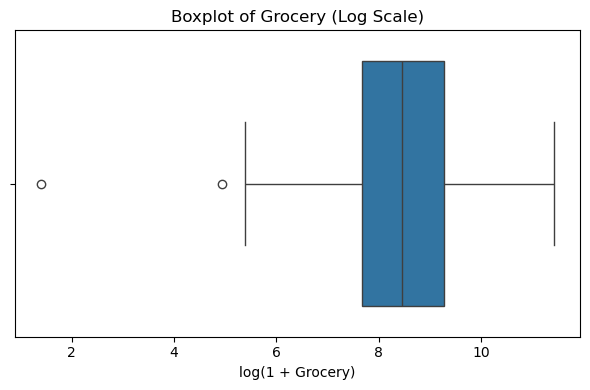

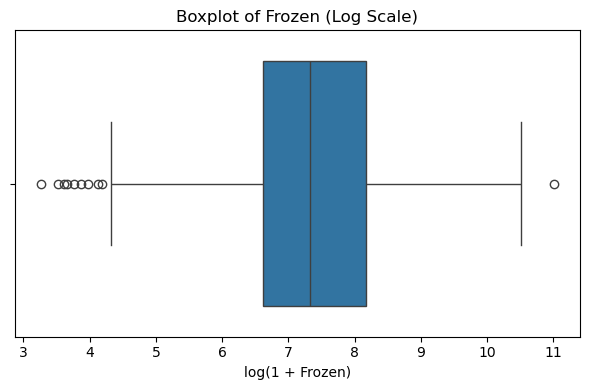

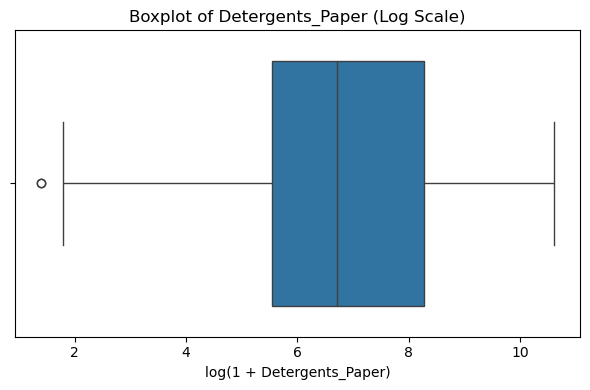

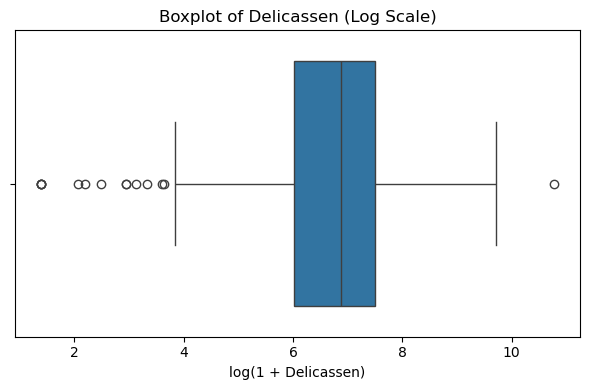

In [46]:
#Implement log scale to resolve highly skewed data observed 
#Numeric columns
numeric_cols = df.select_dtypes(include='number').columns

#Plot each column
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=np.log1p(df[col]))
    plt.title(f'Boxplot of {col} (Log Scale)')
    plt.xlabel(f'log(1 + {col})')
    plt.tight_layout()
    plt.show()

In [ ]:
#Correlation Analysis

In [ ]:
#Data Transformation

In [ ]:
#Feature Selection

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.